# Business Inteligence Sheet 1

### Juan David Camacho
### Hernán Russi
### Juan Esteban Daza  

### Exercise 1 
(1 Point) Create an example (figure with explanation) that shows how K-Means
will update a clustering C in such a way that one cluster becomes empty even though it had
at least one point in C.
Hint: Use a case with two attributes (it’s not possible with one attribute).


### Exercise 2 (4 Points)
1. Write a function kMeans(A, k, eps, mu = None) that runs the kMeans algorithm on
a given 2D-numpy array A with k clusters and termination criterion eps. If no initial
centroids mu are given, use random points in the range of the dataset. Make sure that
new (random) cendroids are created for clusters that become empty.
Let the function return a pair C, mu where C is a list that defines for each instance in
D its cluster (number). mu should be a list of k elements, containing the means of the
respective clusters.

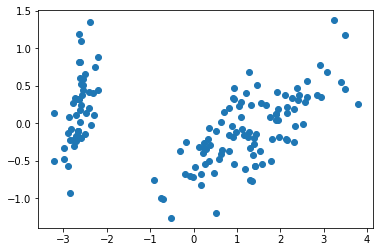

In [38]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import math
import random
from scipy.spatial.distance import cdist

Iris_pca = pd.read_csv("iris_pca.csv")
plt.scatter(Iris_pca.X1, Iris_pca.X2)

iris_numpy = Iris_pca.to_numpy()

In [43]:
print(math.dist((-0.7514671406482273, 0.0785191864293572), (-2.6842071251039497,0.32660731476438853)))
print(math.dist((-2.2088329541767044, -0.1243604202222778), (-2.6842071251039497,0.32660731476438853)))

1.948597333195005
0.6552499526011198


In [120]:

def kMeans(A, k, eps, mu=None):
    centroids = []
    if mu is None:
        centroids = [[random.choice(A[:, 0]), random.choice(A[:, 1])]
                     for x in range(k)]
    else:
        centroids = mu

    dist = cdist(A, centroids, 'euclidean')
    c = np.array([np.argmin(i) for i in dist])

    # for i in range(k):
    #     for j in range(len(A[:, 0])):
    #         if i == c[j]:
    #             #print('C' + str(i) + ' = ' +  str(A[j]))

    while True:
        total = 0
        old_centroids = centroids
        centroids = []
        for kID in range(k):
            new_cent = A[c == kID].mean(axis=0)
            centroids.append(new_cent)
        dist = cdist(A, centroids, 'euclidean')
        c = np.array([np.argmin(i) for i in dist])
        for s in range(k):
            total += (centroids[s] - old_centroids[s])**2
        if (total[0] <= eps and total[1] <= eps):
            break
    
    return c, centroids
